2024-05-31: final check; this version is used for the arxiv 1.0 version of paper

In [1]:
import pandas as pd
from IPython.display import display
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

sns.set_theme()

In [2]:
clemrun_base = '/Users/das/work/svn/Gits/a_Projects/101_clembench/clembench-runs'

In [3]:
v1 = pd.read_csv(clemrun_base + '/v1.0/results.csv')
v1 = v1.rename(columns={v1.columns[0]: 'models'})
v1 = v1.set_index('models')

colname_score = v1.columns[1]
colname_played = v1.columns[2]
colname_quality = v1.columns[3]

v2 = pd.read_csv(clemrun_base + '/v1.6/results.csv')
v2 = v2.rename(columns={v2.columns[0]: 'models'})
v2 = v2.set_index('models')

both = set(v1.index).intersection(set(v2.index))

In [4]:
both

{'CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-Instruct-hf-t0.0',
 'Mistral-7B-Instruct-v0.1-t0.0--Mistral-7B-Instruct-v0.1-t0.0',
 'Mixtral-8x7B-Instruct-v0.1-t0.0--Mixtral-8x7B-Instruct-v0.1-t0.0',
 'SUS-Chat-34B-t0.0--SUS-Chat-34B-t0.0',
 'WizardLM-13b-v1.2-t0.0--WizardLM-13b-v1.2-t0.0',
 'WizardLM-70b-v1.0-t0.0--WizardLM-70b-v1.0-t0.0',
 'Yi-34B-Chat-t0.0--Yi-34B-Chat-t0.0',
 'claude-2.1-t0.0--claude-2.1-t0.0',
 'gpt-4-0613-t0.0--gpt-4-0613-t0.0',
 'gpt-4-1106-preview-t0.0--gpt-4-1106-preview-t0.0',
 'llama-2-70b-chat-hf-t0.0--llama-2-70b-chat-hf-t0.0',
 'openchat-3.5-0106-t0.0--openchat-3.5-0106-t0.0',
 'openchat-3.5-1210-t0.0--openchat-3.5-1210-t0.0',
 'openchat_3.5-t0.0--openchat_3.5-t0.0',
 'sheep-duck-llama-2-13b-t0.0--sheep-duck-llama-2-13b-t0.0',
 'sheep-duck-llama-2-70b-v1.1-t0.0--sheep-duck-llama-2-70b-v1.1-t0.0',
 'tulu-2-dpo-70b-t0.0--tulu-2-dpo-70b-t0.0',
 'vicuna-13b-v1.5-t0.0--vicuna-13b-v1.5-t0.0',
 'vicuna-33b-v1.3-t0.0--vicuna-33b-v1.3-t0.0'}

In [5]:
len(both)

19

In [6]:
diff_df = v2[v2.index.isin(both)].subtract(v1[v1.index.isin(both)])
diff_df.iloc[:,0]

models
CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-Instruct-hf-t0.0        4.01
Mistral-7B-Instruct-v0.1-t0.0--Mistral-7B-Instruct-v0.1-t0.0          6.51
Mixtral-8x7B-Instruct-v0.1-t0.0--Mixtral-8x7B-Instruct-v0.1-t0.0     -9.64
SUS-Chat-34B-t0.0--SUS-Chat-34B-t0.0                                 -1.53
WizardLM-13b-v1.2-t0.0--WizardLM-13b-v1.2-t0.0                        3.66
WizardLM-70b-v1.0-t0.0--WizardLM-70b-v1.0-t0.0                        0.70
Yi-34B-Chat-t0.0--Yi-34B-Chat-t0.0                                   -8.50
claude-2.1-t0.0--claude-2.1-t0.0                                     -3.88
gpt-4-0613-t0.0--gpt-4-0613-t0.0                                     -9.81
gpt-4-1106-preview-t0.0--gpt-4-1106-preview-t0.0                     -8.34
llama-2-70b-chat-hf-t0.0--llama-2-70b-chat-hf-t0.0                   -0.58
openchat-3.5-0106-t0.0--openchat-3.5-0106-t0.0                        2.77
openchat-3.5-1210-t0.0--openchat-3.5-1210-t0.0                        0.61
openchat_3.5-t0.0-

In [7]:
v1_ranking = v1[v1.index.isin(both)][colname_score].rank(ascending=False)
v2_ranking = v2[v2.index.isin(both)][colname_score].rank(ascending=False)

In [8]:
v1_ranking

models
CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-Instruct-hf-t0.0        16.0
Mistral-7B-Instruct-v0.1-t0.0--Mistral-7B-Instruct-v0.1-t0.0          18.0
Mixtral-8x7B-Instruct-v0.1-t0.0--Mixtral-8x7B-Instruct-v0.1-t0.0       5.0
SUS-Chat-34B-t0.0--SUS-Chat-34B-t0.0                                  10.0
WizardLM-13b-v1.2-t0.0--WizardLM-13b-v1.2-t0.0                        13.0
WizardLM-70b-v1.0-t0.0--WizardLM-70b-v1.0-t0.0                         9.0
Yi-34B-Chat-t0.0--Yi-34B-Chat-t0.0                                     4.0
claude-2.1-t0.0--claude-2.1-t0.0                                       3.0
gpt-4-0613-t0.0--gpt-4-0613-t0.0                                       2.0
gpt-4-1106-preview-t0.0--gpt-4-1106-preview-t0.0                       1.0
llama-2-70b-chat-hf-t0.0--llama-2-70b-chat-hf-t0.0                    19.0
openchat-3.5-0106-t0.0--openchat-3.5-0106-t0.0                        11.0
openchat-3.5-1210-t0.0--openchat-3.5-1210-t0.0                         8.0
openchat_3.5-t0.0-

In [9]:
v2_ranking

models
CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-Instruct-hf-t0.0        16.0
Mistral-7B-Instruct-v0.1-t0.0--Mistral-7B-Instruct-v0.1-t0.0          15.0
Mixtral-8x7B-Instruct-v0.1-t0.0--Mixtral-8x7B-Instruct-v0.1-t0.0       9.0
SUS-Chat-34B-t0.0--SUS-Chat-34B-t0.0                                   5.0
WizardLM-13b-v1.2-t0.0--WizardLM-13b-v1.2-t0.0                        13.0
WizardLM-70b-v1.0-t0.0--WizardLM-70b-v1.0-t0.0                        10.0
Yi-34B-Chat-t0.0--Yi-34B-Chat-t0.0                                    12.0
claude-2.1-t0.0--claude-2.1-t0.0                                       3.0
gpt-4-0613-t0.0--gpt-4-0613-t0.0                                       2.0
gpt-4-1106-preview-t0.0--gpt-4-1106-preview-t0.0                       1.0
llama-2-70b-chat-hf-t0.0--llama-2-70b-chat-hf-t0.0                    19.0
openchat-3.5-0106-t0.0--openchat-3.5-0106-t0.0                         6.0
openchat-3.5-1210-t0.0--openchat-3.5-1210-t0.0                         7.0
openchat_3.5-t0.0-

In [10]:
stats.kendalltau(v1_ranking, v2_ranking.loc[v1_ranking.index])

KendalltauResult(correlation=0.7076023391812866, pvalue=4.074348601746193e-06)

In [11]:
v2_ranking.loc[v1_ranking.index]

models
CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-Instruct-hf-t0.0        16.0
Mistral-7B-Instruct-v0.1-t0.0--Mistral-7B-Instruct-v0.1-t0.0          15.0
Mixtral-8x7B-Instruct-v0.1-t0.0--Mixtral-8x7B-Instruct-v0.1-t0.0       9.0
SUS-Chat-34B-t0.0--SUS-Chat-34B-t0.0                                   5.0
WizardLM-13b-v1.2-t0.0--WizardLM-13b-v1.2-t0.0                        13.0
WizardLM-70b-v1.0-t0.0--WizardLM-70b-v1.0-t0.0                        10.0
Yi-34B-Chat-t0.0--Yi-34B-Chat-t0.0                                    12.0
claude-2.1-t0.0--claude-2.1-t0.0                                       3.0
gpt-4-0613-t0.0--gpt-4-0613-t0.0                                       2.0
gpt-4-1106-preview-t0.0--gpt-4-1106-preview-t0.0                       1.0
llama-2-70b-chat-hf-t0.0--llama-2-70b-chat-hf-t0.0                    19.0
openchat-3.5-0106-t0.0--openchat-3.5-0106-t0.0                         6.0
openchat-3.5-1210-t0.0--openchat-3.5-1210-t0.0                         7.0
openchat_3.5-t0.0-

### plot

from: https://github.com/kartikay-bagla/bump-plot-python/tree/master

In [12]:
def bumpchart(df, show_rank_axis= True, rank_axis_distance= 1.1, 
              ax= None, scatter= False, holes= False,
              line_args= {}, scatter_args= {}, hole_args= {}):
    
    if ax is None:
        left_yaxis= plt.gca()
    else:
        left_yaxis = ax

    # Creating the right axis.
    right_yaxis = left_yaxis.twinx()
    
    axes = [left_yaxis, right_yaxis]
    
    # Creating the far right axis if show_rank_axis is True
    if show_rank_axis:
        far_right_yaxis = left_yaxis.twinx()
        axes.append(far_right_yaxis)
    
    for col in df.columns:
        y = df[col]
        x = df.index.values
        # Plotting blank points on the right axis/axes 
        # so that they line up with the left axis.
        for axis in axes[1:]:
            axis.plot(x, y, alpha= 0)

        left_yaxis.plot(x, y, **line_args, solid_capstyle='round')
        
        # Adding scatter plots
        if scatter:
            left_yaxis.scatter(x, y, **scatter_args)
            
            #Adding see-through holes
            if holes:
                bg_color = left_yaxis.get_facecolor()
                left_yaxis.scatter(x, y, color= bg_color, **hole_args)

    # Number of lines
    lines = len(df.columns)

    y_ticks = [*range(1, lines + 1)]
    
    # Configuring the axes so that they line up well.
    for axis in axes:
        axis.invert_yaxis()
        axis.set_yticks(y_ticks)
        axis.set_ylim((lines + 0.5, 0.5))
    
    # Sorting the labels to match the ranks.
    left_labels = df.iloc[0].sort_values().index
    right_labels = df.iloc[-1].sort_values().index
    
    left_yaxis.set_yticklabels(left_labels)
    right_yaxis.set_yticklabels(right_labels)
    
    # Setting the position of the far right axis so that it doesn't overlap with the right axis
    if show_rank_axis:
        far_right_yaxis.spines["right"].set_position(("axes", rank_axis_distance))
    
    return axes

In [13]:
combined_df = pd.DataFrame()

In [14]:
combined_df['v1'] = v1_ranking.values
combined_df.index = v1_ranking.index
combined_df['v2'] = v2_ranking.loc[v1_ranking.index]

In [15]:
combined_df

,v1,v2
models,,
CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-Instruct-hf-t0.0,16.0,16.0
Mistral-7B-Instruct-v0.1-t0.0--Mistral-7B-Instruct-v0.1-t0.0,18.0,15.0
Mixtral-8x7B-Instruct-v0.1-t0.0--Mixtral-8x7B-Instruct-v0.1-t0.0,5.0,9.0
SUS-Chat-34B-t0.0--SUS-Chat-34B-t0.0,10.0,5.0
WizardLM-13b-v1.2-t0.0--WizardLM-13b-v1.2-t0.0,13.0,13.0
WizardLM-70b-v1.0-t0.0--WizardLM-70b-v1.0-t0.0,9.0,10.0
Yi-34B-Chat-t0.0--Yi-34B-Chat-t0.0,4.0,12.0
claude-2.1-t0.0--claude-2.1-t0.0,3.0,3.0
gpt-4-0613-t0.0--gpt-4-0613-t0.0,2.0,2.0


In [16]:
combined_df.transpose()

models,CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-Instruct-hf-t0.0,Mistral-7B-Instruct-v0.1-t0.0--Mistral-7B-Instruct-v0.1-t0.0,Mixtral-8x7B-Instruct-v0.1-t0.0--Mixtral-8x7B-Instruct-v0.1-t0.0,SUS-Chat-34B-t0.0--SUS-Chat-34B-t0.0,WizardLM-13b-v1.2-t0.0--WizardLM-13b-v1.2-t0.0,WizardLM-70b-v1.0-t0.0--WizardLM-70b-v1.0-t0.0,Yi-34B-Chat-t0.0--Yi-34B-Chat-t0.0,claude-2.1-t0.0--claude-2.1-t0.0,gpt-4-0613-t0.0--gpt-4-0613-t0.0,gpt-4-1106-preview-t0.0--gpt-4-1106-preview-t0.0,llama-2-70b-chat-hf-t0.0--llama-2-70b-chat-hf-t0.0,openchat-3.5-0106-t0.0--openchat-3.5-0106-t0.0,openchat-3.5-1210-t0.0--openchat-3.5-1210-t0.0,openchat_3.5-t0.0--openchat_3.5-t0.0,sheep-duck-llama-2-13b-t0.0--sheep-duck-llama-2-13b-t0.0,sheep-duck-llama-2-70b-v1.1-t0.0--sheep-duck-llama-2-70b-v1.1-t0.0,tulu-2-dpo-70b-t0.0--tulu-2-dpo-70b-t0.0,vicuna-13b-v1.5-t0.0--vicuna-13b-v1.5-t0.0,vicuna-33b-v1.3-t0.0--vicuna-33b-v1.3-t0.0
v1,16.0,18.0,5.0,10.0,13.0,9.0,4.0,3.0,2.0,1.0,19.0,11.0,8.0,6.0,14.0,12.0,7.0,15.0,17.0
v2,16.0,15.0,9.0,5.0,13.0,10.0,12.0,3.0,2.0,1.0,19.0,6.0,7.0,4.0,17.0,11.0,8.0,14.0,18.0


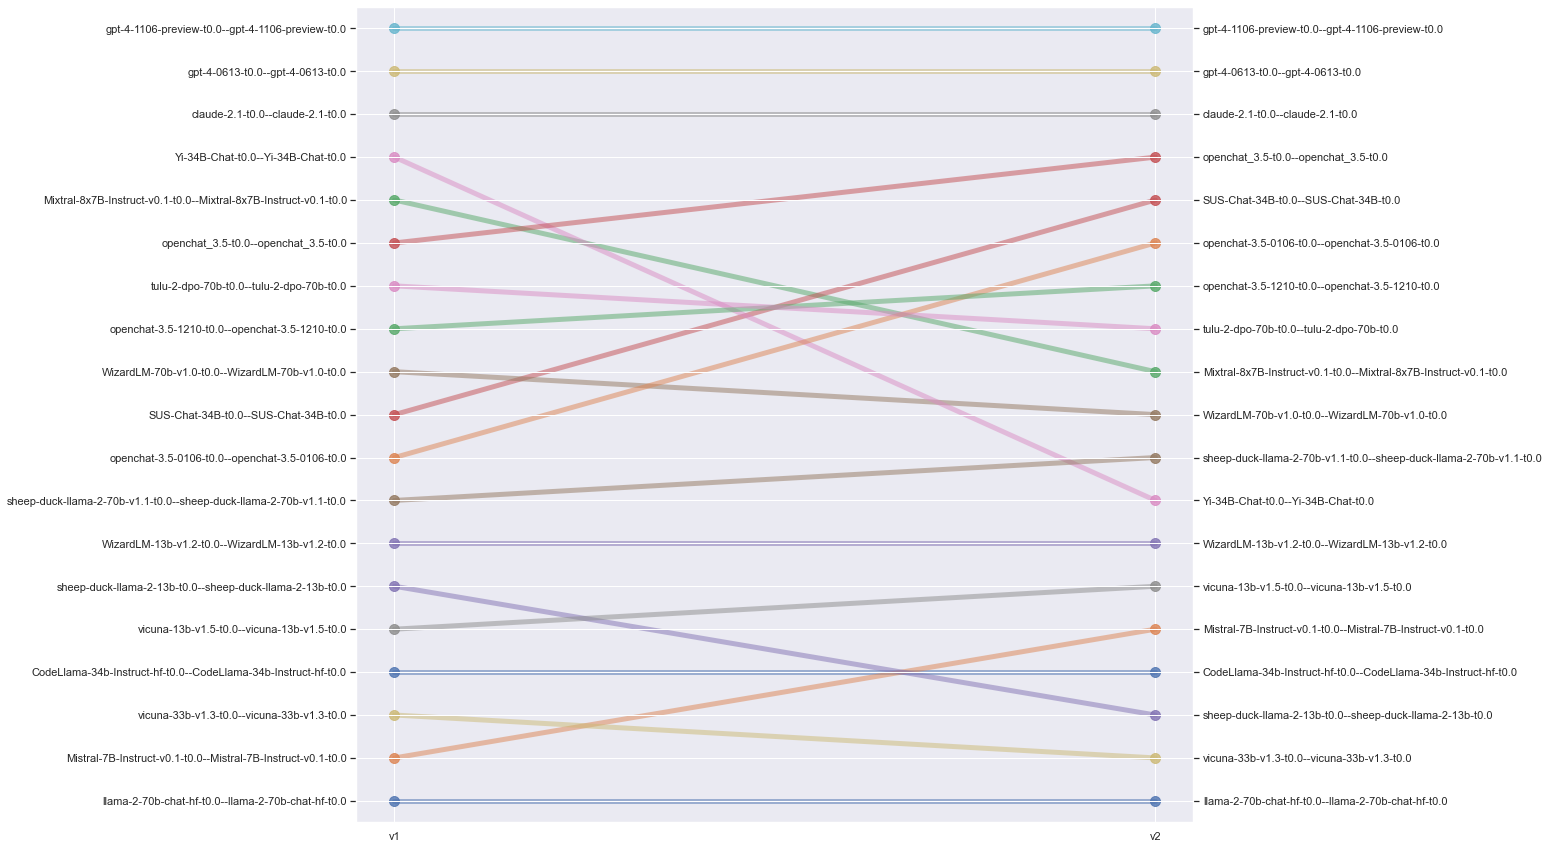

In [17]:
plt.figure(figsize=(15, 15))
bumpchart(combined_df.transpose(), show_rank_axis= False, scatter= True, holes= False,
          line_args= {"linewidth": 5, "alpha": 0.5}, scatter_args= {"s": 100, "alpha": 0.8})
# plt.yticks(fontsize=25)
plt.show()

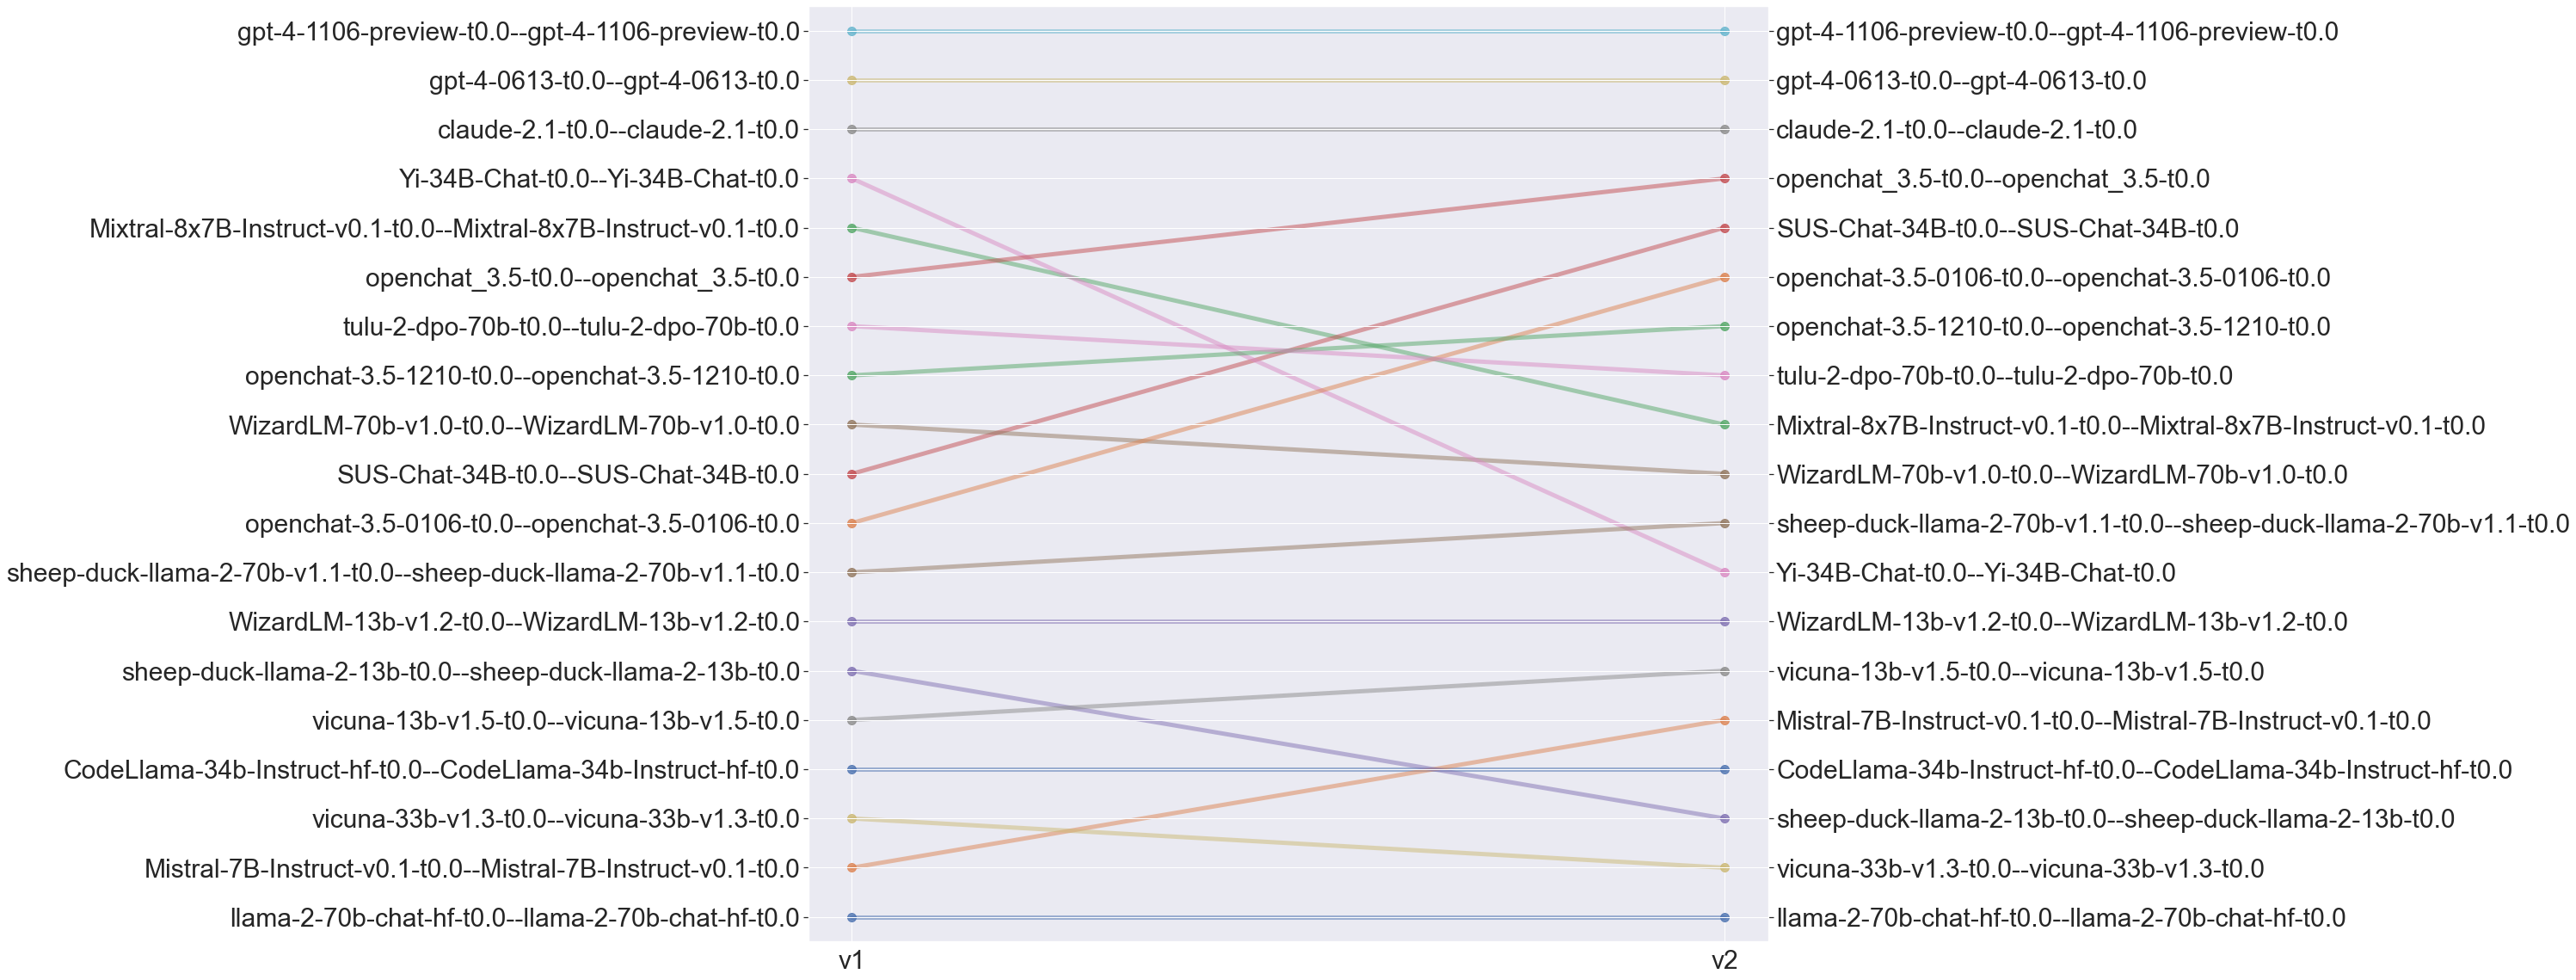

In [18]:
plt.figure(figsize=(20, 20))
axes = bumpchart(combined_df.transpose(), show_rank_axis= False, scatter= True, holes= False,
          line_args= {"linewidth": 5, "alpha": 0.5}, scatter_args= {"s": 100, "alpha": 0.8})
axes[0].tick_params(labelsize=30)
axes[1].tick_params(labelsize=30)
plt.show()